In [ ]:
pip install https://github.com/tussedrotten/pylie/archive/master.zip

     \ 33.7 kB 922.8 kB/s 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylie: filename=pylie-1.0.2-py3-none-any.whl size=13884 sha256=f6b2236be9977f2ca8890ff11f9a6a5ec916abca51fbbff9d8ff052d35816bd7
  Stored in directory: /tmp/pip-ephem-wheel-cache-3fwqg97i/wheels/82/31/7d/18ffacb09d14ba8c7772b2f408bc82ad96a0352df04002875c
Successfully built pylie


In [ ]:
pip install https://github.com/tussedrotten/visgeom/archive/master.zip

     - 9.5 kB ? 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for visgeom: filename=visgeom-0.2.1-py3-none-any.whl size=5345 sha256=322e3bc9e9db21ae7c5cf569628862aa3af17bb0fe2a800565eae0516255ade6
  Stored in directory: /tmp/pip-ephem-wheel-cache-0ldh52g5/wheels/32/63/0f/ff38d29fc56b154c0452828537a32b4e54d3bcbcc0fdc45f06
Successfully built visgeom


In [ ]:
pip install pyqt5

In [ ]:
pip install setuptools pytest

In [ ]:
# MUST be first
import matplotlib
matplotlib.use("Agg", force=True)

import matplotlib.pyplot as plt
import numpy as np

print("Backend:", plt.get_backend())

# safe plotting
fig, ax = plt.subplots()
ax.plot([0,1],[0,1])
plt.savefig("test.png")


In [ ]:
import os
os.environ["MPLBACKEND"] = "Agg"   # must be set before matplotlib imports

import matplotlib
matplotlib.use("Agg", force=True)

import matplotlib.pyplot as plt
print("Backend:", plt.get_backend())


In [ ]:
!pip install ipywidgets

from google.colab import output
output.enable_custom_widget_manager()
%matplotlib widget

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import visgeom as vg
import numpy as np

# Define distribution in 3D.
mean = np.zeros((3, 1))
covariance = np.diag(np.array([1, 2, 1]) ** 2)

# Draw points from distribution.
num_draws = 1000
random_points = np.random.multivariate_normal(mean.flatten(), covariance, num_draws).T

# Plot result.
# Use Qt 5 backend in visualisation.
matplotlib.use('Agg')

# Create figure and axis.
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Plot simulated points.
ax.plot(random_points[0, :], random_points[1, :], random_points[2, :], 'k.', alpha=0.1)

# Plot the estimated mean pose.
vg.plot_covariance_ellipsoid(ax, mean, covariance)

# Show figure.
vg.plot.axis_equal(ax)
plt.show()

In [ ]:
# Force headless-safe backend BEFORE matplotlib or visgeom
import os
os.environ["MPLBACKEND"] = "Agg"

import matplotlib
matplotlib.use("Agg", force=True)


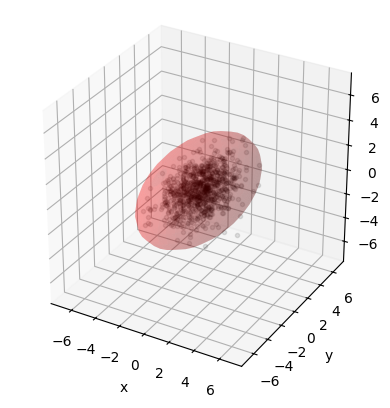

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import visgeom as vg
from IPython.display import display


# Define distribution in 3D
mean = np.zeros((3, 1))
covariance = np.diag(np.array([1, 2, 1]) ** 2)

# Draw points from distribution
num_draws = 1000
random_points = np.random.multivariate_normal(
    mean.flatten(), covariance, num_draws
).T

# Create figure and axis
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Plot simulated points
ax.plot(
    random_points[0, :],
    random_points[1, :],
    random_points[2, :],
    'k.',
    alpha=0.1
)

# Plot the estimated mean pose
vg.plot_covariance_ellipsoid(ax, mean, covariance)

# Equal axis scaling
vg.plot.axis_equal(ax)

# Show figure inline
plt.show()
# display(fig)


In [ ]:
import matplotlib.pyplot as plt
import matplotlib
import visgeom as vg
import numpy as np
from scipy.spatial.transform import Rotation

# Use Qt 5 backend in visualisation.
# matplotlib.use('qt5agg')

# Create axis.
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Camera intrinsics and pose.
K = np.array([[50, 0, 40],
              [0, 50, 30],
              [0, 0, 1]])
R_w_c = np.array([[-1, 0, 0],
                  [0, 0, -1],
                  [0, -1, 0]])
t_w_c = np.array([[3, 3, 0]]).T
pose_w_c = (R_w_c, t_w_c)

# Plot camera.
vg.plot_pose(ax, pose_w_c, scale=0.4, text='$\\mathcal{F}_c$')
vg.plot_camera_frustum(ax, K, pose_w_c, alpha=0.1)
vg.plot_camera_image_plane(ax, K, pose_w_c, scale=1)

# Plot a box in 3D.
R_w_b = Rotation.from_rotvec([0, 0, np.pi / 6]).as_matrix()
t_w_b = np.array([[3, 0, 0]]).T
points_w = vg.utils.generate_box(pose=(R_w_b, t_w_b), scale=0.6)
vg.utils.plot_as_box(ax, points_w)

# Project the box onto the image plane.
points_c = R_w_c.T @ points_w - (R_w_c.T @ t_w_c)
xn = points_c / points_c[2, :]
xn_w = R_w_c @ xn + t_w_c
vg.utils.plot_as_box(ax, xn_w)

# Show figure.
vg.plot.axis_equal(ax)
plt.show()

In [ ]:
import numpy as np
import plotly.graph_objects as go


In [ ]:
# Mean and covariance
mean = np.zeros((3, 1))
covariance = np.diag(np.array([1, 2, 1]) ** 2)

# Draw points
num_draws = 1000
random_points = np.random.multivariate_normal(
    mean.flatten(), covariance, num_draws
)


In [ ]:
def covariance_ellipsoid(mean, cov, n_theta=40, n_phi=40):
    # Eigen-decomposition
    eigvals, eigvecs = np.linalg.eigh(cov)

    # Radii (1-sigma)
    rx, ry, rz = np.sqrt(eigvals)

    # Parameterization of unit sphere
    theta = np.linspace(0, 2 * np.pi, n_theta)
    phi = np.linspace(0, np.pi, n_phi)
    theta, phi = np.meshgrid(theta, phi)

    x = rx * np.cos(theta) * np.sin(phi)
    y = ry * np.sin(theta) * np.sin(phi)
    z = rz * np.cos(phi)

    # Rotate ellipsoid
    ellipsoid = eigvecs @ np.vstack((x.flatten(), y.flatten(), z.flatten()))
    x_e, y_e, z_e = ellipsoid.reshape(3, *x.shape)

    # Translate
    x_e += mean[0, 0]
    y_e += mean[1, 0]
    z_e += mean[2, 0]

    return x_e, y_e, z_e


In [ ]:
# Ellipsoid mesh
x_e, y_e, z_e = covariance_ellipsoid(mean, covariance)

fig = go.Figure()

# Point cloud
fig.add_trace(
    go.Scatter3d(
        x=random_points[:, 0],
        y=random_points[:, 1],
        z=random_points[:, 2],
        mode='markers',
        marker=dict(size=2, color='black', opacity=0.15),
        name='Samples'
    )
)

# Covariance ellipsoid
fig.add_trace(
    go.Surface(
        x=x_e,
        y=y_e,
        z=z_e,
        opacity=0.4,
        showscale=False,
        name='1σ ellipsoid'
    )
)

# Mean point
fig.add_trace(
    go.Scatter3d(
        x=[mean[0, 0]],
        y=[mean[1, 0]],
        z=[mean[2, 0]],
        mode='markers',
        marker=dict(size=6, color='red'),
        name='Mean'
    )
)


In [ ]:
fig.update_layout(
    scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='z',
        aspectmode='data'   # IMPORTANT: equal scaling
    ),
    title='3D Gaussian Samples with Covariance Ellipsoid',
    margin=dict(l=0, r=0, b=0, t=40)
)

fig


In [ ]:
import numpy as np
import plotly.graph_objects as go


def plotly_covariance_ellipsoid(
    mean,
    covariance,
    chi2_val=11.345,
    n_theta=40,
    n_phi=40
):
    # SVD (matches visgeom)
    U, s, _ = np.linalg.svd(covariance)

    # Same scale as visgeom
    scale = np.sqrt(chi2_val * s)

    # Unit sphere parameterization
    theta = np.linspace(0, 2*np.pi, n_theta)
    phi = np.linspace(0, np.pi, n_phi)
    theta, phi = np.meshgrid(theta, phi)

    x = scale[0] * np.cos(theta) * np.sin(phi)
    y = scale[1] * np.sin(theta) * np.sin(phi)
    z = scale[2] * np.cos(phi)

    # Rotate
    ellipsoid = U @ np.vstack((x.flatten(), y.flatten(), z.flatten()))
    x_e, y_e, z_e = ellipsoid.reshape(3, *x.shape)

    # Translate
    x_e += mean[0, 0]
    y_e += mean[1, 0]
    z_e += mean[2, 0]

    return x_e, y_e, z_e


In [ ]:
# Mean and covariance
mean = np.zeros((3, 1))
covariance = np.diag([1, 4, 1])

x_e, y_e, z_e = plotly_covariance_ellipsoid(mean, covariance)

fig = go.Figure()

fig.add_trace(
    go.Surface(
        x=x_e,
        y=y_e,
        z=z_e,
        opacity=0.4,
        showscale=False,
        name="99% covariance ellipsoid"
    )
)

fig.update_layout(
    scene=dict(
        aspectmode="data",
        xaxis_title="x",
        yaxis_title="y",
        zaxis_title="z",
    ),
    title="Covariance Ellipsoid (visgeom-equivalent)"
)

fig


In [ ]:
import numpy as np
import plotly.graph_objects as go


In [ ]:
# Define distribution in 3D
mean = np.zeros((3, 1))
covariance = np.diag(np.array([1, 2, 1]) ** 2)

# Draw points from distribution
num_draws = 1000
random_points = np.random.multivariate_normal(
    mean.flatten(), covariance, num_draws
)


In [ ]:
def plotly_covariance_ellipsoid(
    mean,
    covariance,
    chi2_val=11.345,
    n_theta=40,
    n_phi=40,
):
    # Same decomposition as visgeom
    U, s, _ = np.linalg.svd(covariance)

    # Same scaling as visgeom
    scale = np.sqrt(chi2_val * s)

    # Unit sphere parameterization
    theta = np.linspace(0, 2*np.pi, n_theta)
    phi = np.linspace(0, np.pi, n_phi)
    theta, phi = np.meshgrid(theta, phi)

    x = scale[0] * np.cos(theta) * np.sin(phi)
    y = scale[1] * np.sin(theta) * np.sin(phi)
    z = scale[2] * np.cos(phi)

    # Rotate
    ellipsoid = U @ np.vstack((x.flatten(), y.flatten(), z.flatten()))
    x_e, y_e, z_e = ellipsoid.reshape(3, *x.shape)

    # Translate
    x_e += mean[0, 0]
    y_e += mean[1, 0]
    z_e += mean[2, 0]

    return x_e, y_e, z_e


In [ ]:
# Ellipsoid surface
x_e, y_e, z_e = plotly_covariance_ellipsoid(mean, covariance)

fig = go.Figure()

# Sampled points (same visual density as matplotlib)
fig.add_trace(
    go.Scatter3d(
        x=random_points[:, 0],
        y=random_points[:, 1],
        z=random_points[:, 2],
        mode="markers",
        marker=dict(size=2, color="black", opacity=0.15),
        name="Samples",
    )
)

# Covariance ellipsoid
fig.add_trace(
    go.Surface(
        x=x_e,
        y=y_e,
        z=z_e,
        opacity=0.35,
        showscale=False,
        name="99% covariance ellipsoid",
    )
)


In [ ]:
fig.update_layout(
    scene=dict(
        xaxis_title="x",
        yaxis_title="y",
        zaxis_title="z",
        aspectmode="data",  # equal axis scaling (vg.plot.axis_equal)
    ),
    title="3D Gaussian Samples with Covariance Ellipsoid",
    margin=dict(l=0, r=0, t=40, b=0),
)

fig


In [ ]:
import numpy as np
import plotly.graph_objects as go
from scipy.spatial.transform import Rotation


In [ ]:
def plotly_frame(fig, R, t, scale=1.0, name="", colors=("red", "green", "blue")):
    origin = t.flatten()
    for i, c in enumerate(colors):
        axis = origin + scale * R[:, i]
        fig.add_trace(
            go.Scatter3d(
                x=[origin[0], axis[0]],
                y=[origin[1], axis[1]],
                z=[origin[2], axis[2]],
                mode="lines",
                line=dict(color=c, width=5),
                name=f"{name} axis {i}",
                showlegend=False,
            )
        )


In [ ]:
def plotly_camera_frustum(fig, K, R_w_c, t_w_c, scale=1.0, alpha=0.15):
    img_w = int(2 * K[0, 2])
    img_h = int(2 * K[1, 2])

    img_corners = np.array([
        [0, img_w, img_w, 0],
        [0, 0, img_h, img_h],
        [1, 1, 1, 1],
    ])

    xn = np.linalg.inv(K) @ img_corners
    frustum_c = np.hstack((np.zeros((3, 1)), xn))
    frustum_w = R_w_c @ (scale * frustum_c) + t_w_c

    inds = [0, 1, 2, 3, 0, 4, 1, 4, 2, 4, 3]

    fig.add_trace(
        go.Scatter3d(
            x=frustum_w[0, inds],
            y=frustum_w[1, inds],
            z=frustum_w[2, inds],
            mode="lines",
            line=dict(color="black"),
            opacity=alpha,
            name="Camera frustum",
            showlegend=False,
        )
    )


In [ ]:
def plotly_image_plane(fig, K, R_w_c, t_w_c, scale=1.0, alpha=0.25):
    img_w = int(2 * K[0, 2])
    img_h = int(2 * K[1, 2])

    img_corners = np.array([
        [0, img_w, img_w, 0],
        [0, 0, img_h, img_h],
        [1, 1, 1, 1],
    ])

    xn = np.linalg.inv(K) @ img_corners
    plane_w = R_w_c @ (scale * xn) + t_w_c

    fig.add_trace(
        go.Mesh3d(
            x=plane_w[0],
            y=plane_w[1],
            z=plane_w[2],
            color="blue",
            opacity=alpha,
            name="Image plane",
            showlegend=False,
        )
    )


In [ ]:
def generate_box(R, t, scale=1.0):
    s = scale / 2
    corners = np.array([
        [-s, -s, -s],
        [ s, -s, -s],
        [ s,  s, -s],
        [-s,  s, -s],
        [-s, -s,  s],
        [ s, -s,  s],
        [ s,  s,  s],
        [-s,  s,  s],
    ]).T
    return R @ corners + t


def plotly_box(fig, pts, color="black", name="Box"):
    edges = [
        (0,1),(1,2),(2,3),(3,0),
        (4,5),(5,6),(6,7),(7,4),
        (0,4),(1,5),(2,6),(3,7),
    ]
    for i, j in edges:
        fig.add_trace(
            go.Scatter3d(
                x=[pts[0,i], pts[0,j]],
                y=[pts[1,i], pts[1,j]],
                z=[pts[2,i], pts[2,j]],
                mode="lines",
                line=dict(color=color, width=4),
                showlegend=False,
            )
        )


In [ ]:
fig = go.Figure()

K = np.array([[50, 0, 40],
              [0, 50, 30],
              [0, 0, 1]])

R_w_c = np.array([[-1, 0, 0],
                  [0, 0, -1],
                  [0, -1, 0]])
t_w_c = np.array([[3, 3, 0]]).T


In [ ]:
plotly_frame(fig, R_w_c, t_w_c, scale=0.4, name="Camera")
plotly_camera_frustum(fig, K, R_w_c, t_w_c, alpha=0.15)
plotly_image_plane(fig, K, R_w_c, t_w_c)


NameError: name 'plotly_camera_frustum' is not defined

In [ ]:
R_w_b = Rotation.from_rotvec([0, 0, np.pi / 6]).as_matrix()
t_w_b = np.array([[3, 0, 0]]).T

points_w = generate_box(R_w_b, t_w_b, scale=0.6)
plotly_box(fig, points_w, color="black")

# Project box onto image plane
points_c = R_w_c.T @ points_w - R_w_c.T @ t_w_c
xn = points_c / points_c[2, :]
xn_w = R_w_c @ xn + t_w_c

plotly_box(fig, xn_w, color="red", name="Projection")


In [ ]:
fig.update_layout(
    scene=dict(
        xaxis_title="x",
        yaxis_title="y",
        zaxis_title="z",
        aspectmode="data",
    ),
    title="Camera, Frustum, Image Plane, and Projection (Plotly)",
    margin=dict(l=0, r=0, t=40, b=0),
)

fig


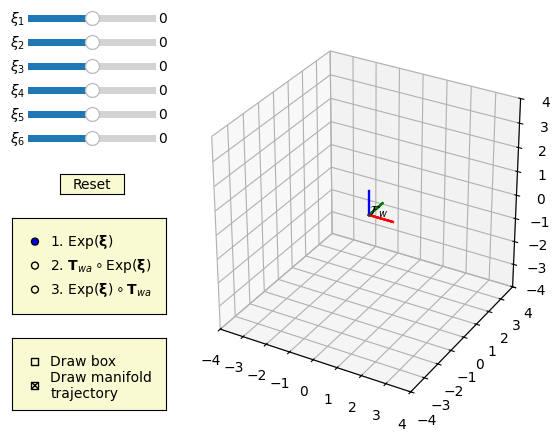

In [ ]:
import visgeom as vg
from pylie import SO3, SE3
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons, CheckButtons

"""Example - Visualizes different perturbations and the path they take along the manifold"""


def vis_perturbations():
    # Define the fixed frame "a" relative to the world frame "w".
    T_w_a = SE3((SO3.from_roll_pitch_yaw(5*np.pi/4, 0, np.pi/2), np.array([[2, 2, 2]]).T))

    # The vector xi represents a perturbation on the tangent vector space.
    # We change the elements in this vector by using the sliders.
    xi_vec = np.zeros([6, 1])

    # We can choose to draw an oriented box around the perturbed pose,
    # and we can draw the trajectory along the manifold (by interpolation).
    draw_options = {'Draw box': False, 'Draw manifold\ntrajectory': True}

    # Use Qt 5 backend in visualisation.
    # matplotlib.use('Agg')

    # Create figure and axis.
    fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
    plt.subplots_adjust(left=0.25)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.margins(x=0)

    # Add the widgets.
    widget_color = 'lightgoldenrodyellow'
    xi_sliders = [Slider(plt.axes([0.05, 0.9 - 0.05*i, 0.20, 0.03], facecolor=widget_color),
                         r'$\xi_' + str(i+1) + '$', -4.0, 4.0, valinit=xi_vec[i].item(), valstep=0.01) for i in range(6)]
    button = Button(plt.axes([0.1, 0.55, 0.1, 0.04]), 'Reset', color=widget_color, hovercolor='0.975')
    check = CheckButtons(plt.axes([0.025, 0.10, 0.24, 0.15], facecolor=widget_color),
                         draw_options.keys(),
                         draw_options.values())
    radio = RadioButtons(plt.axes([0.025, 0.3, 0.24, 0.2], facecolor=widget_color),
                         (r'1. $\mathrm{Exp}(\mathbf{\xi})$',
                          r'2. $\mathbf{T}_{wa} \circ \mathrm{Exp}(\mathbf{\xi})$',
                          r'3. $\mathrm{Exp}(\mathbf{\xi}) \circ \mathbf{T}_{wa}$'),
                         active=0)

    # Setup the update callback, which is called by the sliders and the radio buttons.
    def update(val):
        ax.clear()
        for i, slider in enumerate(xi_sliders):
            xi_vec[i] = slider.val

        if radio.value_selected[0] == '1':
            draw_exp(ax, xi_vec, draw_options)
        elif radio.value_selected[0] == '2':
            draw_right_perturbation(ax, T_w_a, xi_vec, draw_options)
        else:
            draw_left_perturbation(ax, T_w_a, xi_vec, draw_options)

        ax.set_xlim(-4, 4)
        ax.set_ylim(-4, 4)
        ax.set_zlim(-4, 4)
        vg.plot.axis_equal(ax)

        fig.canvas.draw_idle()
    for slider in xi_sliders:
        slider.on_changed(update)
    radio.on_clicked(update)

    # Setup the check buttons to update the "draw options".
    def update_draw_options(label):
        draw_options[label] = not draw_options[label]
        update([])
    check.on_clicked(update_draw_options)

    # Setup the reset callback, used by the reset button.
    def reset(event):
        for slider in xi_sliders:
            slider.reset()
    button.on_clicked(reset)

    # Start with first update.
    update([])
    plt.show()


def draw_exp(ax, xi_vec, draw_options):
    vg.plot_pose(ax, SE3().to_tuple(), scale=1, text='$\\mathcal{F}_w$')
    T_l = SE3.Exp(xi_vec)
    vg.plot_pose(ax, T_l.to_tuple()) #, text=r'$\mathrm{Exp}(\mathbf{\xi})$')

    if draw_options['Draw box']:
        box_points = vg.utils.generate_box(pose=T_l.to_tuple(), scale=1)
        vg.utils.plot_as_box(ax, box_points)

    if draw_options['Draw manifold\ntrajectory']:
        draw_interpolated(ax, SE3(), xi_vec, SE3())


def draw_right_perturbation(ax, T_w_a, xi_vec, draw_options):
    vg.plot_pose(ax, SE3().to_tuple(), scale=1, text='$\\mathcal{F}_w$')
    vg.plot_pose(ax, T_w_a.to_tuple(), scale=1, text='$\\mathcal{F}_a$')
    T_r = T_w_a @ SE3.Exp(xi_vec)

    vg.plot_pose(ax, T_r.to_tuple())

    if draw_options['Draw box']:
        box_points = vg.utils.generate_box(pose=T_r.to_tuple(), scale=1)
        vg.utils.plot_as_box(ax, box_points)

    if draw_options['Draw manifold\ntrajectory']:
        draw_interpolated(ax, T_w_a, xi_vec, SE3())


def draw_left_perturbation(ax, T_w_a, xi_vec, draw_options):
    vg.plot_pose(ax, SE3().to_tuple(), scale=1, text='$\\mathcal{F}_w$')
    vg.plot_pose(ax, T_w_a.to_tuple(), scale=1, text='$\\mathcal{F}_a$')
    T_l = SE3.Exp(xi_vec) @ T_w_a
    vg.plot_pose(ax, T_l.to_tuple())

    if draw_options['Draw box']:
        box_points = vg.utils.generate_box(pose=T_l.to_tuple(), scale=1)
        vg.utils.plot_as_box(ax, box_points)

    if draw_options['Draw manifold\ntrajectory']:
        draw_interpolated(ax, SE3(), xi_vec, T_w_a)


def draw_interpolated(ax, T_1, xi, T_2):
    for alpha in np.linspace(0, 1, 20):
        T = T_1 @ SE3.Exp(alpha * xi) @ T_2
        vg.plot_pose(ax, T.to_tuple(), alpha=0.1)


if __name__ == "__main__":
    vis_perturbations()

In [ ]:
def build_scene(
    xi,
    mode="exp",
    draw_box=False,
    draw_traj=True,
):
    fig = go.Figure()

    # Fixed frame T_w_a
    T_w_a = SE3((
        SO3.from_roll_pitch_yaw(5*np.pi/4, 0, np.pi/2),
        np.array([[2, 2, 2]]).T
    ))

    # World frame
    plotly_frame(fig, np.eye(3), np.zeros(3), scale=1.0, name="Fw")

    if mode != "exp":
        plotly_frame(fig, *T_w_a.to_tuple(), scale=1.0, name="Fa")

    # Compute perturbed pose
    if mode == "exp":
        T = SE3.Exp(xi)
        T_base = SE3()
    elif mode == "right":
        T = T_w_a @ SE3.Exp(xi)
        T_base = T_w_a
    else:  # left
        T = SE3.Exp(xi) @ T_w_a
        T_base = SE3()

    # Plot pose
    plotly_frame(fig, *T.to_tuple(), scale=1.0, name="T")

    # Optional box
    if draw_box:
        box_pts = generate_box(*T.to_tuple(), scale=1.0)
        plotly_box(fig, box_pts, color="black")

    # Manifold trajectory
    if draw_traj:
        for alpha in np.linspace(0, 1, 20):
            Ti = T_base @ SE3.Exp(alpha * xi)
            plotly_frame(fig, *Ti.to_tuple(), scale=1.0)

    fig.update_layout(
        scene=dict(
            aspectmode="data",
            xaxis=dict(range=[-4, 4]),
            yaxis=dict(range=[-4, 4]),
            zaxis=dict(range=[-4, 4]),
        ),
        margin=dict(l=0, r=0, t=40, b=0),
        title="SE(3) Perturbations on the Manifold",
    )

    return fig


In [ ]:
xi0 = np.zeros((6, 1))


In [ ]:
sliders = []

for i in range(6):
    steps = []
    for v in np.linspace(-4, 4, 41):
        xi = xi0.copy()
        xi[i, 0] = v

        steps.append(
            dict(
                method="update",
                args=[{
                    "data": build_scene(
                        xi,
                        mode="exp",
                        draw_box=False,
                        draw_traj=True
                    ).data
                }],
                label=f"{v:.1f}"
            )
        )

    sliders.append(
        dict(
            active=20,
            currentvalue={"prefix": f"ξ{i+1} = "},
            pad={"t": 20},
            steps=steps,
        )
    )


In [ ]:
mode_buttons = dict(
    buttons=[
        dict(
            label="Exp(ξ)",
            method="update",
            args=[{"data": build_scene(xi0, "exp").data}],
        ),
        dict(
            label="Twa ∘ Exp(ξ)",
            method="update",
            args=[{"data": build_scene(xi0, "right").data}],
        ),
        dict(
            label="Exp(ξ) ∘ Twa",
            method="update",
            args=[{"data": build_scene(xi0, "left").data}],
        ),
    ],
    direction="down",
    x=0.02,
    y=0.95,
)


In [ ]:
fig = build_scene(xi0)

fig.update_layout(
    sliders=sliders,
    updatemenus=[mode_buttons],
)

fig


In [ ]:
# ===============================
# SE(3) perturbation visualization
# Plotly notebook version (single cell)
# ===============================

import numpy as np
import plotly.graph_objects as go
from pylie import SO3, SE3

# -------------------------------
# Helper: plot a coordinate frame
# -------------------------------
def plotly_frame(data, R, t, scale=1.0, opacity=1.0):
    t = t.flatten()
    colors = ["red", "green", "blue"]
    for i in range(3):
        axis = t + scale * R[:, i]
        data.append(
            go.Scatter3d(
                x=[t[0], axis[0]],
                y=[t[1], axis[1]],
                z=[t[2], axis[2]],
                mode="lines",
                line=dict(color=colors[i], width=6),
                opacity=opacity,
                showlegend=False,
            )
        )

# -------------------------------
# Fixed frame T_w_a
# -------------------------------
T_w_a = SE3((
    SO3.from_roll_pitch_yaw(5*np.pi/4, 0, np.pi/2),
    np.array([[2, 2, 2]]).T
))

# -------------------------------
# Precompute frames (THIS is key)
# We vary ONE component of xi
# -------------------------------
vals = np.linspace(-3, 3, 31)
frames = []

for v in vals:
    xi = np.zeros((6, 1))
    xi[0, 0] = v   # perturb ξ₁ only (clean & pedagogical)

    data = []

    # World frame
    plotly_frame(data, *SE3().to_tuple(), scale=1.0)

    # Anchor frame
    plotly_frame(data, *T_w_a.to_tuple(), scale=1.0)

    # Right perturbation
    T = T_w_a @ SE3.Exp(xi)
    plotly_frame(data, *T.to_tuple(), scale=1.0)

    # Manifold trajectory
    for a in np.linspace(0, 1, 20):
        Ti = T_w_a @ SE3.Exp(a * xi)
        plotly_frame(data, *Ti.to_tuple(), scale=0.6, opacity=0.15)

    frames.append(
        go.Frame(
            data=data,
            name=f"{v:.2f}"
        )
    )

# -------------------------------
# Base figure
# -------------------------------
fig = go.Figure(
    data=frames[len(frames)//2].data,
    frames=frames
)

# -------------------------------
# Slider (animation-based)
# -------------------------------
fig.update_layout(
    sliders=[{
        "steps": [
            {
                "args": [[f"{v:.2f}"], {"frame": {"duration": 0}, "mode": "immediate"}],
                "label": f"{v:.2f}",
                "method": "animate",
            }
            for v in vals
        ],
        "currentvalue": {"prefix": "ξ₁ = "},
        "pad": {"t": 30},
    }],
    scene=dict(
        aspectmode="data",
        xaxis=dict(range=[-4, 4]),
        yaxis=dict(range=[-4, 4]),
        zaxis=dict(range=[-4, 4]),
    ),
    title="SE(3) Right Perturbation on the Manifold (Plotly, Colab)",
    margin=dict(l=0, r=0, t=50, b=0),
)

fig


In [ ]:
# ============================================================
# Plotly notebook adaptation of vis_perturbations (single cell)
# ============================================================

import numpy as np
import plotly.graph_objects as go
from pylie import SO3, SE3

# ------------------------------------------------------------
# Helper: draw a coordinate frame (Plotly version of vg.plot_pose)
# ------------------------------------------------------------
def plotly_frame(data, R, t, scale=1.0, opacity=1.0):
    t = t.flatten()
    colors = ["red", "green", "blue"]
    for i in range(3):
        axis = t + scale * R[:, i]
        data.append(
            go.Scatter3d(
                x=[t[0], axis[0]],
                y=[t[1], axis[1]],
                z=[t[2], axis[2]],
                mode="lines",
                line=dict(color=colors[i], width=6),
                opacity=opacity,
                showlegend=False,
            )
        )

# ------------------------------------------------------------
# Fixed frame T_w_a (same as original code)
# ------------------------------------------------------------
T_w_a = SE3((
    SO3.from_roll_pitch_yaw(5*np.pi/4, 0, np.pi/2),
    np.array([[2, 2, 2]]).T
))

# ------------------------------------------------------------
# Choose perturbation mode here:
# "exp"   -> Exp(xi)
# "right" -> T_wa ∘ Exp(xi)
# "left"  -> Exp(xi) ∘ T_wa
# ------------------------------------------------------------
MODE = "right"   # change to "exp" or "left" if desired

# ------------------------------------------------------------
# Precompute frames (Plotly animation model)
# We vary ONE component of xi (xi_1), like a slider
# ------------------------------------------------------------
vals = np.linspace(-3.0, 3.0, 31)
frames = []

for v in vals:
    xi = np.zeros((6, 1))
    xi[0, 0] = v   # perturb ξ₁

    data = []

    # World frame F_w
    plotly_frame(data, *SE3().to_tuple(), scale=1.0)

    # Anchor frame F_a (only for right / left)
    if MODE in ["right", "left"]:
        plotly_frame(data, *T_w_a.to_tuple(), scale=1.0)

    # Compute perturbed pose
    if MODE == "exp":
        T = SE3.Exp(xi)
        T_base_1 = SE3()
        T_base_2 = SE3()

    elif MODE == "right":
        T = T_w_a @ SE3.Exp(xi)
        T_base_1 = T_w_a
        T_base_2 = SE3()

    else:  # left
        T = SE3.Exp(xi) @ T_w_a
        T_base_1 = SE3()
        T_base_2 = T_w_a

    # Plot perturbed pose
    plotly_frame(data, *T.to_tuple(), scale=1.0)

    # Manifold trajectory (same logic as draw_interpolated)
    for alpha in np.linspace(0, 1, 20):
        Ti = T_base_1 @ SE3.Exp(alpha * xi) @ T_base_2
        plotly_frame(data, *Ti.to_tuple(), scale=0.6, opacity=0.15)

    frames.append(
        go.Frame(
            data=data,
            name=f"{v:.2f}"
        )
    )

# ------------------------------------------------------------
# Base figure
# ------------------------------------------------------------
fig = go.Figure(
    data=frames[len(frames)//2].data,
    frames=frames
)

# ------------------------------------------------------------
# Slider (animation-based, notebook-safe)
# ------------------------------------------------------------
fig.update_layout(
    sliders=[{
        "steps": [
            {
                "args": [[f"{v:.2f}"], {"frame": {"duration": 0}, "mode": "immediate"}],
                "label": f"{v:.2f}",
                "method": "animate",
            }
            for v in vals
        ],
        "currentvalue": {"prefix": "ξ₁ = "},
        "pad": {"t": 30},
    }],
    scene=dict(
        aspectmode="data",
        xaxis=dict(range=[-4, 4]),
        yaxis=dict(range=[-4, 4]),
        zaxis=dict(range=[-4, 4]),
    ),
    title=f"SE(3) Perturbations on the Manifold (mode = {MODE})",
    margin=dict(l=0, r=0, t=50, b=0),
)

fig


In [ ]:
# ============================================================
# Plotly notebook version: pose interpolation on SE(3)
# ============================================================

import numpy as np
import plotly.graph_objects as go
from pylie import SO3, SE3

# ------------------------------------------------------------
# Helper: linear interpolation in the Lie algebra
# (same as your original code)
# ------------------------------------------------------------
def interpolate_lie_element(alpha, X_1, X_2):
    return X_1 + alpha * (X_2 - X_1)

# ------------------------------------------------------------
# Helper: plot a coordinate frame (Plotly version of vg.plot_pose)
# ------------------------------------------------------------
def plotly_frame(data, R, t, scale=1.0, opacity=1.0):
    t = t.flatten()
    colors = ["red", "green", "blue"]
    for i in range(3):
        axis = t + scale * R[:, i]
        data.append(
            go.Scatter3d(
                x=[t[0], axis[0]],
                y=[t[1], axis[1]],
                z=[t[2], axis[2]],
                mode="lines",
                line=dict(color=colors[i], width=6),
                opacity=opacity,
                showlegend=False,
            )
        )

# ------------------------------------------------------------
# Define the two poses (same as original)
# ------------------------------------------------------------
T_1 = SE3((
    SO3.from_roll_pitch_yaw(np.pi / 4, 0, np.pi / 2),
    np.array([[1, 1, 1]]).T
))

T_2 = SE3((
    SO3.from_roll_pitch_yaw(-np.pi / 6, np.pi / 4, np.pi / 2),
    np.array([[1, 4, 2]]).T
))

# ------------------------------------------------------------
# Precompute interpolation frames (Plotly animation model)
# ------------------------------------------------------------
alphas = np.linspace(0, 1, 21)
frames = []

for a in alphas:
    data = []

    # Plot the two endpoint poses
    plotly_frame(data, *T_1.to_tuple(), scale=1.0)
    plotly_frame(data, *T_2.to_tuple(), scale=1.0)

    # Interpolated pose
    T = interpolate_lie_element(a, T_1, T_2)
    plotly_frame(data, *T.to_tuple(), scale=1.0, opacity=0.25)

    frames.append(
        go.Frame(
            data=data,
            name=f"{a:.2f}"
        )
    )

# ------------------------------------------------------------
# Base figure
# ------------------------------------------------------------
fig = go.Figure(
    data=frames[0].data,
    frames=frames
)

# ------------------------------------------------------------
# Slider (animation-based, notebook-safe)
# ------------------------------------------------------------
fig.update_layout(
    sliders=[{
        "steps": [
            {
                "args": [[f"{a:.2f}"], {"frame": {"duration": 0}, "mode": "immediate"}],
                "label": f"{a:.2f}",
                "method": "animate",
            }
            for a in alphas
        ],
        "currentvalue": {"prefix": "α = "},
        "pad": {"t": 30},
    }],
    scene=dict(
        aspectmode="data",
        xaxis=dict(range=[0, 4]),
        yaxis=dict(range=[0, 5]),
        zaxis=dict(range=[0, 4]),
    ),
    title="Linear Interpolation of Poses on SE(3)",
    margin=dict(l=0, r=0, t=50, b=0),
)

fig


In [ ]:
# ============================================================
# Plotly notebook version: pose interpolation on SE(3)
# with full interpolation path
# ============================================================

import numpy as np
import plotly.graph_objects as go
from pylie import SO3, SE3

# ------------------------------------------------------------
# Linear interpolation (same as original example)
# ------------------------------------------------------------
def interpolate_lie_element(alpha, X_1, X_2):
    return X_1 + alpha * (X_2 - X_1)

# ------------------------------------------------------------
# Plotly version of vg.plot_pose
# ------------------------------------------------------------
def plotly_frame(data, R, t, scale=1.0, opacity=1.0):
    t = t.flatten()
    colors = ["red", "green", "blue"]
    for i in range(3):
        axis = t + scale * R[:, i]
        data.append(
            go.Scatter3d(
                x=[t[0], axis[0]],
                y=[t[1], axis[1]],
                z=[t[2], axis[2]],
                mode="lines",
                line=dict(color=colors[i], width=6),
                opacity=opacity,
                showlegend=False,
            )
        )

# ------------------------------------------------------------
# Define the two poses (same as original)
# ------------------------------------------------------------
T_1 = SE3((
    SO3.from_roll_pitch_yaw(np.pi / 4, 0, np.pi / 2),
    np.array([[1, 1, 1]]).T
))

T_2 = SE3((
    SO3.from_roll_pitch_yaw(-np.pi / 6, np.pi / 4, np.pi / 2),
    np.array([[1, 4, 2]]).T
))

# ------------------------------------------------------------
# Precompute the interpolation path (ALL frames)
# ------------------------------------------------------------
alphas = np.linspace(0, 1, 21)
interp_poses = [interpolate_lie_element(a, T_1, T_2) for a in alphas]

# ------------------------------------------------------------
# Build animation frames
# ------------------------------------------------------------
frames = []

for k, a in enumerate(alphas):
    data = []

    # Endpoint poses
    plotly_frame(data, *T_1.to_tuple(), scale=1.0)
    plotly_frame(data, *T_2.to_tuple(), scale=1.0)

    # Full interpolation path (faint)
    for T in interp_poses:
        plotly_frame(data, *T.to_tuple(), scale=0.8, opacity=0.08)

    # Highlight current interpolated pose
    plotly_frame(data, *interp_poses[k].to_tuple(), scale=1.0, opacity=0.9)

    frames.append(
        go.Frame(
            data=data,
            name=f"{a:.2f}"
        )
    )

# ------------------------------------------------------------
# Base figure
# ------------------------------------------------------------
fig = go.Figure(
    data=frames[0].data,
    frames=frames
)

# ------------------------------------------------------------
# Slider (animation-based, notebook-safe)
# ------------------------------------------------------------
fig.update_layout(
    sliders=[{
        "steps": [
            {
                "args": [[f"{a:.2f}"], {"frame": {"duration": 0}, "mode": "immediate"}],
                "label": f"{a:.2f}",
                "method": "animate",
            }
            for a in alphas
        ],
        "currentvalue": {"prefix": "α = "},
        "pad": {"t": 30},
    }],
    scene=dict(
        aspectmode="data",
        xaxis=dict(range=[0, 4]),
        yaxis=dict(range=[0, 5]),
        zaxis=dict(range=[0, 4]),
    ),
    title="Pose Interpolation on SE(3) with Full Path",
    margin=dict(l=0, r=0, t=50, b=0),
)

fig


In [ ]:
# ============================================================
# Tangent-space vs Manifold interpolation on SE(3)
# (FIXED: correct Plotly trace handling)
# ============================================================

import numpy as np
import plotly.graph_objects as go
from pylie import SO3, SE3

# ------------------------------------------------------------
# Helper: Plotly version of vg.plot_pose (FIXED)
# ------------------------------------------------------------
def plotly_frame(fig, R, t, scale=0.6, opacity=1.0):
    t = t.flatten()
    colors = ["red", "green", "blue"]
    for i in range(3):
        axis = t + scale * R[:, i]
        fig.add_trace(
            go.Scatter3d(
                x=[t[0], axis[0]],
                y=[t[1], axis[1]],
                z=[t[2], axis[2]],
                mode="lines",
                line=dict(color=colors[i], width=5),
                opacity=opacity,
                showlegend=False,
            )
        )

# ------------------------------------------------------------
# Define two poses
# ------------------------------------------------------------
T1 = SE3((
    SO3.from_roll_pitch_yaw(np.pi/4, 0, np.pi/2),
    np.array([[1, 1, 1]]).T
))

T2 = SE3((
    SO3.from_roll_pitch_yaw(-np.pi/6, np.pi/4, np.pi/2),
    np.array([[4, 3, 2]]).T
))

# ------------------------------------------------------------
# Interpolation parameters
# ------------------------------------------------------------
alphas = np.linspace(0, 1, 15)

# ------------------------------------------------------------
# Build figure
# ------------------------------------------------------------
fig = go.Figure()

# Start and end poses
plotly_frame(fig, *T1.to_tuple(), scale=1.0, opacity=1.0)
plotly_frame(fig, *T2.to_tuple(), scale=1.0, opacity=1.0)

# ------------------------------------------------------------
# 1️⃣ Tangent-space interpolation (WRONG path)
# ------------------------------------------------------------
xi1 = T1.Log()
xi2 = T2.Log()

for a in alphas:
    xi_lin = (1 - a) * xi1 + a * xi2
    T_lin = SE3.Exp(xi_lin)
    plotly_frame(fig, *T_lin.to_tuple(), scale=0.5, opacity=0.15)

# ------------------------------------------------------------
# 2️⃣ Manifold interpolation (CORRECT path)
# ------------------------------------------------------------
delta = T2 - T1  # Log(T1^{-1} T2)

for a in alphas:
    T_geo = T1 + a * delta
    plotly_frame(fig, *T_geo.to_tuple(), scale=0.5, opacity=0.6)

# ------------------------------------------------------------
# Layout
# ------------------------------------------------------------
fig.update_layout(
    scene=dict(
        aspectmode="data",
        xaxis=dict(range=[0, 5]),
        yaxis=dict(range=[0, 5]),
        zaxis=dict(range=[0, 4]),
    ),
    title=(
        "Tangent-space (faint) vs Manifold (bold) interpolation on SE(3)<br>"
        "<span style='font-size:14px'>"
        "Faint = linear in se(3), Bold = geodesic on SE(3)</span>"
    ),
    margin=dict(l=0, r=0, t=70, b=0),
)

fig
